In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\sajal\AppData\Local\Temp\ipykernel_10152\28686874.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Step 1: Load the dataset
file_path = 'Indian automoble buying behavour study 1.0.csv' 
data = pd.read_csv(file_path)

In [3]:
# Step 2: Select relevant features for clustering
features_extended = ['Age', 'No of Dependents', 'Salary', 'Total Salary', 'Price', 'Profession', 'Marrital Status']

In [4]:
# Step 3: One-hot encode categorical variables
data_extended = data[features_extended].copy()
data_encoded = pd.get_dummies(data_extended, columns=['Profession', 'Marrital Status'], drop_first=True)

In [5]:
data_encoded.dropna(inplace=True)

In [6]:
scaler = StandardScaler()
data_scaled_extended = scaler.fit_transform(data_encoded)

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled_extended)
    wcss.append(kmeans.inertia_)

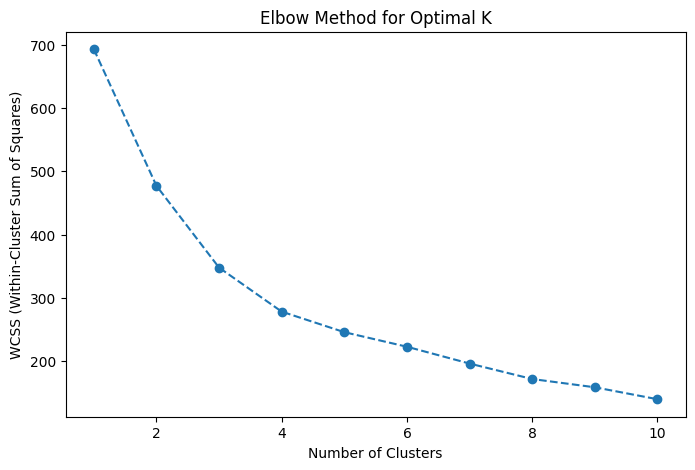

In [8]:
# Plot the elbow graph to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [9]:
#Apply K-Means with the optimal number of clusters (assume it's 4 from the elbow plot)
kmeans_extended = KMeans(n_clusters=4, random_state=42)
data_encoded['Cluster'] = kmeans_extended.fit_predict(data_scaled_extended)

#Analyze the cluster centroids
cluster_centers_extended = pd.DataFrame(scaler.inverse_transform(kmeans_extended.cluster_centers_), 
                                        columns=data_encoded.columns[:-1])
cluster_centers_extended['Cluster'] = range(1, 5)

In [10]:
print(cluster_centers_extended)

         Age  No of Dependents        Salary  Total Salary         Price  \
0  33.827586          2.137931  1.413793e+06  1.968966e+06  1.086552e+06   
1  42.068966          2.724138  2.568966e+06  3.503448e+06  1.510345e+06   
2  37.346154          2.730769  1.453846e+06  1.826923e+06  1.050000e+06   
3  28.200000          0.266667  1.240000e+06  1.240000e+06  1.040000e+06   

   Profession_Salaried  Marrital Status_Single  Cluster  
0         1.000000e+00                     0.0        1  
1         8.965517e-01                     0.0        2  
2        -2.220446e-16                     0.0        3  
3         6.000000e-01                     1.0        4  


In [11]:
data['Cluster'] = data_encoded['Cluster']
data.to_csv('segmented_market_data.csv', index=False)

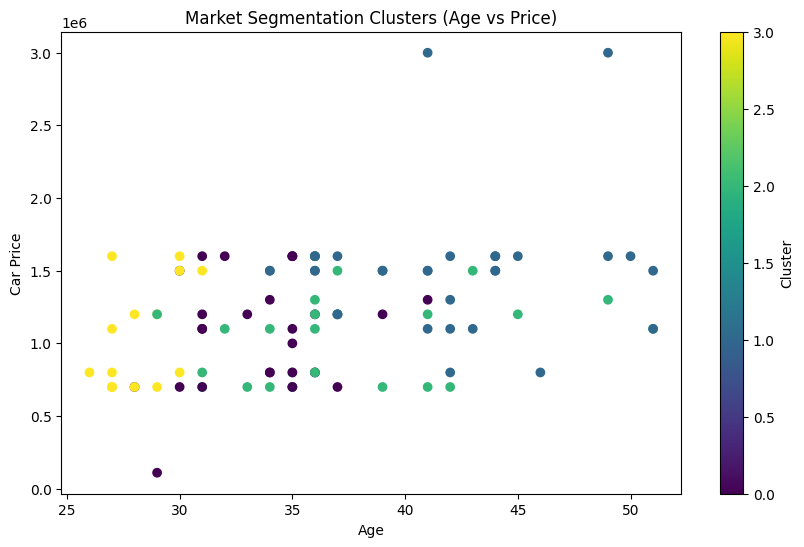

In [12]:
#Visualize the clusters in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Price'], c=data['Cluster'], cmap='viridis')
plt.title('Market Segmentation Clusters (Age vs Price)')
plt.xlabel('Age')
plt.ylabel('Car Price')
plt.colorbar(label='Cluster')
plt.show()